In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import joblib  # Import joblib for saving the model


In [2]:
# Load the dataset
df = pd.read_csv('customer-Churn.csv')  # replace 'customer_churn.csv' with your dataset file name


In [3]:
# Data exploration
print(df.head())
print(df.info())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
# Assume the last column is the target and the rest are features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [5]:
# Handle missing values (example: fill with mean) if any
if X.isnull().sum().any():
    X = X.fillna(X.mean())

In [6]:
# One-hot encode categorical variables
X = pd.get_dummies(X)

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"F1 Score: {f1}")

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()

Logistic Regression:
Accuracy: 0.6593328601845281
Recall: 0.8954423592493298
Precision: 0.4309677419354839
F1 Score: 0.5818815331010453


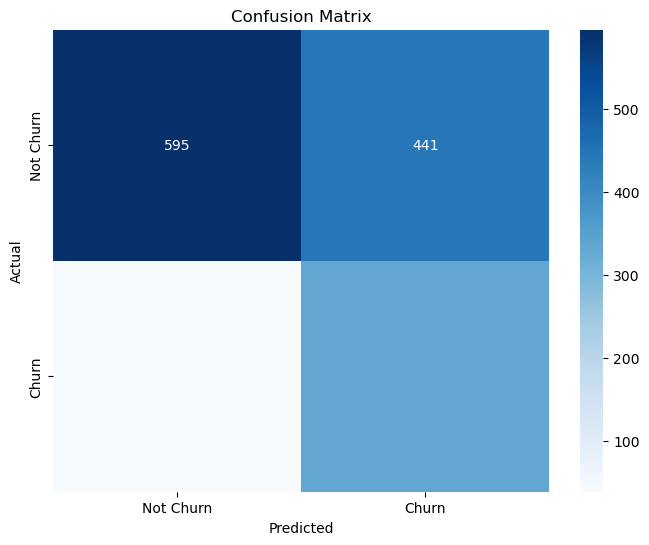

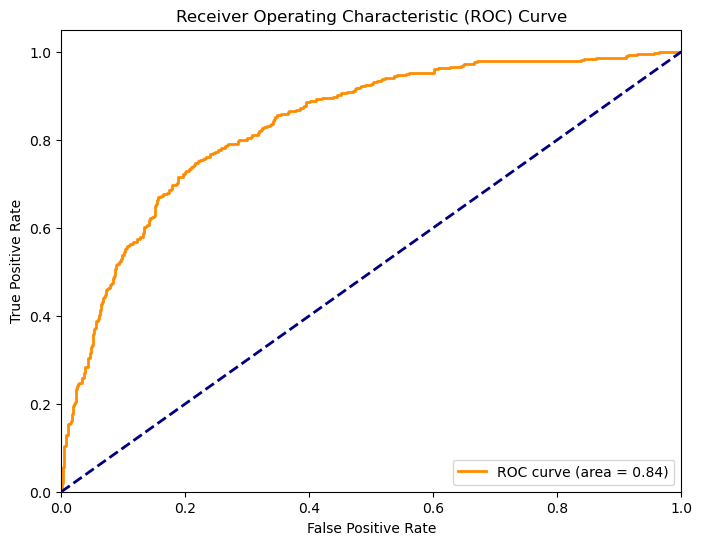

In [9]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
print("Logistic Regression:")
evaluate_model(log_reg, X_test, y_test)


Random Forest:
Accuracy: 0.7963094393186657
Recall: 0.46112600536193027
Precision: 0.6666666666666666
F1 Score: 0.5451664025356577


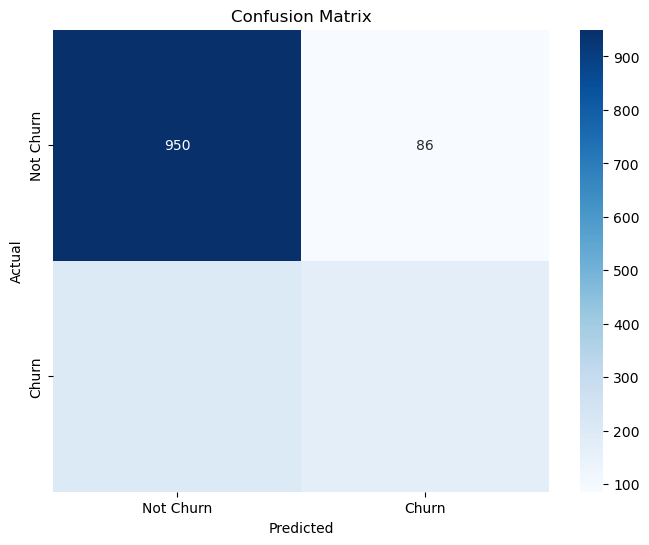

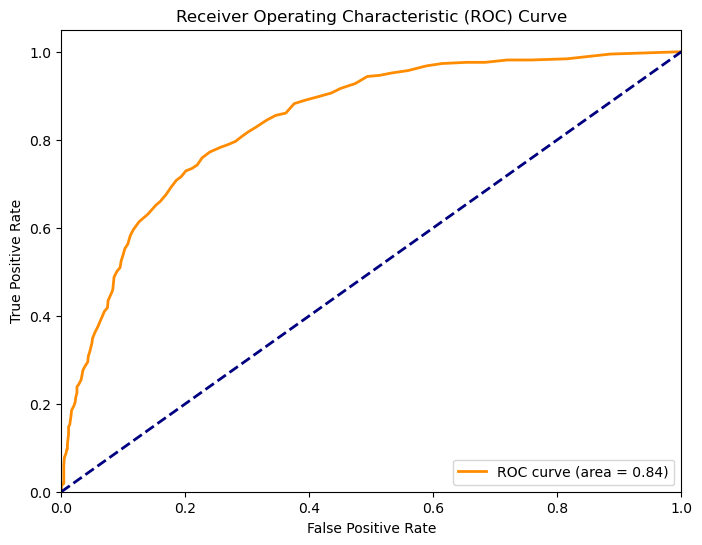

In [10]:
# Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
print("Random Forest:")
evaluate_model(random_forest, X_test, y_test)


In [12]:
# Comparison of models
models = {'Logistic Regression': log_reg, 'Random Forest': random_forest}
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F1 Score': f1}

results_df = pd.DataFrame(results).T
print("\nModel Comparison:\n", results_df)



Model Comparison:
                      Accuracy    Recall  Precision  F1 Score
Logistic Regression  0.659333  0.895442   0.430968  0.581882
Random Forest        0.796309  0.461126   0.666667  0.545166


In [13]:

best_model_name = results_df['F1 Score'].idxmax()
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} with F1 Score: {results_df.loc[best_model_name, 'F1 Score']}")

# Save the best model (optional)
joblib.dump(best_model, 'best_model_churn.pkl')

# Optional: Load the model and make predictions (for verification)
loaded_model = joblib.load('best_model_churn.pkl')
y_pred_loaded = loaded_model.predict(X_test)
print(f"Predictions from loaded model: {y_pred_loaded}")


Best Model: Logistic Regression with F1 Score: 0.5818815331010453
Predictions from loaded model: [1 0 0 ... 0 0 1]
